# 5-1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm import tqdm

delta = 0.022

xini = 0
xfinal = 2
nxstep = 128
xstep = (xfinal - xini) / nxstep

ntstep = 1000000
tfinal = 2
tini = 0
tstep = (tfinal - tini) / ntstep

In [11]:
# [0,:] [0,:] no meaning
u = np.zeros((nxstep + 4, ntstep + 4), dtype=float)

for j in range(1, nxstep + 2):
    u[j, 1] = np.cos(np.pi * (xini + (j - 1) * xstep))

u[nxstep + 2, 1] = u[2, 1]
u[nxstep + 3, 1] = u[3, 1]

In [12]:
for i in tqdm(range(2, ntstep + 2)):
    for j in range(3, nxstep + 2):
        u[j, i] = u[j, i - 1] - 1 / 6 * (tstep / xstep) * (
            u[j + 1, i - 1] + u[j, i - 1] + u[j - 1, i - 1]) * (
                u[j + 1, i - 1] - u[j - 1, i - 1]) - delta**2 * tstep / (
                    2 * xstep**3) * (u[j + 2, i - 1] - 2 * u[j + 1, i - 1] +
                                     2 * u[j - 1, i - 1] -
                                     u[j - 2, i - 1])
    u[1, i] = u[1, i - 1] - tstep * (
        1 / 6 / xstep * (u[2, i - 1] + u[1, i - 1] + u[nxstep, i - 1]) *
        (u[2, i - 1] - u[nxstep, i - 1]) + delta**2 *
        (u[3, i - 1] - 2 * u[2, i - 1] + 2 * u[nxstep, i - 1] -
         u[nxstep - 1, i - 1]) / 2 / xstep**3)
    u[2, i] = u[2, i - 1] - tstep * (1 / 6 / xstep *
                           (u[3, i - 1] + u[2, i - 1] + u[1, i - 1]) *
                           (u[3, i - 1] - u[1, i - 1]) + delta**2 *
                           (u[4, i - 1] - 2 * u[3, i - 1] + 2 * u[1, i - 1] -
                            u[nxstep - 1, i - 1]) / 2 / xstep**3)
    u[nxstep + 2, i] = u[2, i]
    u[nxstep + 3, i] = u[3, i]


100%|██████████| 1000000/1000000 [12:23<00:00, 1345.52it/s]


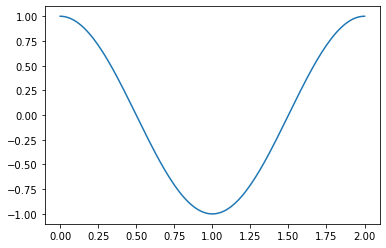

In [13]:
xl = [2/128*i for i in range(129)]

plt.plot(xl, u[1:130, 1])
plt.show()

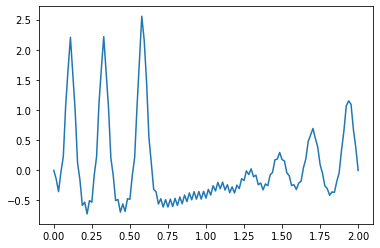

In [14]:
xl = [2 / 128 * i for i in range(129)]
plt.plot(xl, u[1:130, ntstep//2])
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


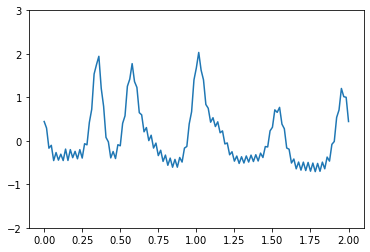

In [15]:
from matplotlib import animation


fig, ax = plt.subplots()
ax.set_ylim(-2, 3)
x = [2 / 128 * i for i in range(129)]
line, = ax.plot(x, u[1:130,1])

def animate(i):
    line.set_ydata(u[1:130, 200 * i])
    return line,

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=int(ntstep/200),
                              interval=20)
ani.save("1.gif")
plt.show()

演示动画见[1](1.gif)

# 5-2

$$
\frac{\partial T}{\partial t} = \frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}
$$

$$
\begin{cases}
    T|_{x=0} = T|_{x=1} = 0\\
    \frac{\partial T}{\partial y}|_{y=0} = \frac{\partial T}{\partial y}|_{y=1} = 0
\end{cases}
$$
根据 $x$ 方向上的边界条件 $T|_{x=0} = T|_{x=1} = 0$，可将 $T$ 展开：
$$
T = \sum_{i=1}^{I}\phi_i(y,t)\sin{(i\pi x)}
$$
记 $j$ 为 $y$ 的格点数，$j=0,\cdots,J$; $n$ 为 $t$ 的格点数 $N=0,\cdots,N$.
则上式（傅里叶变换）及其逆变换可以写作：
$$
T_{i,j} = \sum_{k=1}^{I}\phi_{k,j}\sin{(k\pi \frac{i}{I})}\\
\phi_{i,j} = \frac{2}{I}\sum_{k=1}^{I}T_{k,j}\sin{(k\pi \frac{i}{I})}
$$

代回方程得：
$$
\begin{aligned}
\frac{\partial \phi_i}{\partial t} &= -(i\pi)^2\phi_i+\frac{\partial^2 \phi_i}{\partial y^2}\\
\frac{\phi_{i,j}^{n+1}-\phi_{i,j}^{n}}{\delta t} &=-\frac{(i\pi)^2}{2}(\phi_{i,j}^{n+1}+\phi_{i,j}^{n})+\frac{1}{2}(\frac{\phi_{i,j+1}^{n+1}-2\phi_{i,j}^{n+1}+\phi_{i,j-1}^{n+1}}{\delta y^2}+\frac{\phi_{i,j+1}^{n}-2\phi_{i,j}^{n}+\phi_{i,j-1}^{n}}{\delta y^2})\\
\end{aligned}
$$

$$
-\frac{C}{2} \phi^{n+1}_{i,j-1} + [1+C(1+\frac{(i\pi\delta y)^2}{2})]\phi^{n+1}_{i,j} - \frac{C}{2}\phi^{n+1}_{i,j+1}=\frac{C}{2}\phi^{n}_{i,j-1} + [1-C(1+\frac{(i\pi\delta y)^2}{2})]t^{n}_{i,j} +\frac{C}{2}\phi^{n}_{i,j+1}
$$

其中，
$$
C = \frac{\delta t}{\delta y^2};\quad i = 0,\cdots,I; \quad j = 1,\cdots, J-1
$$

再利用 $y$ 方向的边界条件 $\frac{\partial T}{\partial y}|_{y=0} = \frac{\partial T}{\partial y}|_{y=1} = 0$，可以得到：

$$
\phi_{i,0} = \phi_{i,1}\\
\phi_{i,J-1} = \phi_{i,J}
$$

由此，可以得到从 $n$ 时刻到 $n+1$ 时刻 $\phi$ 的递推关系：

$$
\begin{bmatrix}
    1&-1&&&&\\
    -\frac{C}{2}&M&-\frac{C}{2}&&\\
    &&&&\\
    &\ddots&\ddots&\ddots&\\
    &&&&\\
    &&-\frac{C}{2}&M&-\frac{C}{2}\\
    &&&1&-1
\end{bmatrix}
\cdot
\begin{bmatrix}
    \phi_{i,0}^{n+1}\\
    \phi_{i,1}^{n+1}\\
    \\
    \\
    \vdots\\
    \\
    \phi_{i,J}^{n+1}
\end{bmatrix}=
\begin{bmatrix}
    0\\
    f(\phi_{i,0}^{n},\phi_{i,1}^{n},\phi_{i,2}^{n})\\
    f(\phi_{i,1}^{n},\phi_{i,2}^{n},\phi_{i,3}^{n})\\
    \vdots\\
    \\
    f(\phi_{i,J-2}^{n},\phi_{i,J-1}^{n},\phi_{i,J}^{n})\\
    0
\end{bmatrix}
$$
其中，
$$
M = 1+C(1+\frac{(i\pi\delta y)^2}{2})\\
f(\phi^{n}_{i,j-1},\phi^{n}_{i,j},\phi^{n}_{i,j+1})=\frac{C}{2}\phi^{n}_{i,j-1} + [1-C(1+\frac{(i\pi\delta y)^2}{2})]\phi^{n}_{i,j} +\frac{C}{2}\phi^{n}_{i,j+1}
$$

In [135]:
def solve(Am, b):
    n = len(Am)
    L = np.eye(n)
    U = np.eye(n)
    U[0, 0] = Am[0, 0]
    for i in range(1, n):
        L[i, i - 1] = Am[i, i - 1] / U[i - 1, i - 1]
        U[i, i] = Am[i, i] - L[i, i - 1] * Am[i - 1, i]
        U[i - 1, i] = Am[i - 1, i]
    L_b = np.c_[L, b]
    y = np.zeros(n)
    for i in range(n):
        sum = 0
        for j in range(i):
            sum += L_b[i, j] * y[j]
        y[i] = (L_b[i, n] - sum) / L_b[i, i]
    U_y = np.c_[U, y]
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        sum = 0
        for j in range(i + 1, n):
            sum += U_y[i, j] * x[j]
        x[i] = (U_y[i, n] - sum) / U_y[i, i]
    return x

In [136]:
class diffusion():
    def __init__(self, I, J, N):
        self.I = I
        self.J = J
        self.N = N
        self.xini = 0
        self.xfin = 1
        self.xstep = (self.xfin - self.xini) / I
        self.yini = 0
        self.yfin = 1
        self.ystep = (self.yfin - self.yini) / J
        self.tini = 0
        self.tfin = 0.3
        self.tstep = (self.tfin - self.tini) / N
        self.T = np.zeros((I + 1, J + 1, N + 1))
        self.phi = np.zeros((I + 1, J + 1, N + 1))

        self.C = self.tstep / self.ystep**2
        # M=0的三对角矩阵
        A = np.zeros((self.J+1,self.J+1))
        A[0,0] = 1
        A[0,1] = -1
        A[-1,-2] = 1
        A[-1,-1] = -1
        for i in range(1,self.J):
            A[i][i-1] = -self.C / 2
            A[i][i+1] = -self.C / 2
        self.A = A

    def i_to_x(self, i):
        return self.xini + self.xstep * i

    def j_to_y(self, j):
        return self.yini + self.ystep * j

    def n_to_t(self, n):
        return self.tini + self.tstep * n

    # 初始条件
    def set_initial(self):
        for i in range(self.I + 1):
            for j in range(self.J + 1):
                self.T[i, j, 0] = np.sin(np.pi * self.i_to_x(i)) * np.cos(
                    np.pi * self.j_to_y(j))
        n = 0
        for i in range(self.I + 1):
            for j in range(self.J + 1):
                sum = 0
                for k in range(1, self.I + 1):
                    sum += self.T[k, j, n] * np.sin(k * np.pi * i / self.I)
                self.phi[i, j, n] = 2 * sum / self.I

    def phi_to_T(self):
        for n in range(self.N+1):
            for i in range(self.I+1):
                for j in range(self.J+1):
                    sum = 0
                    for k in range(1, self.I+1):
                        sum += self.phi[k,j,n] * np.sin(k * np.pi * i / self.I)
                    self.T[i,j,n] = sum

    # def T_to_phi(self):
    #     for n in range(self.N + 1):
    #         for i in range(self.I + 1):
    #             for j in range(self.J + 1):
    #                 sum = 0
    #                 for k in range(1, self.I + 1):
    #                     sum += self.T[k,j,n] * np.sin(k * np.pi * i / self.I)
    #                 self.phi[i,j,n] = 2 * sum / self.I

    def Am(self,i):
        Ap = np.eye(self.J+1)
        Ap[0,0] = 0
        Ap[-1,-1] = 0
        return self.A + Ap * (1 + self.C * (1 + (i * np.pi * self.ystep)**2 / 2))

    def f(self,i,x,y,z):
        return self.C / 2 * x + (1 - self.C * (1 + (i * np.pi * self.ystep)**2 / 2)) * y + self.C / 2 * z

    def B(self,i,n):
        b = np.zeros(self.J+1)
        for j in range(1,self.J):
            b[j] = self.f(i,self.phi[i,j-1,n], self.phi[i,j,n], self.phi[i,j+1,n])
        return b

    def forward(self):
        for n in range(1, self.N+1):
            for i in range(self.I+1):
                self.phi[i,:,n] = solve(self.Am(i),self.B(i,n-1))


In [137]:
d = diffusion(10,10,1000)
d.set_initial()
d.forward()
d.phi_to_T()

MovieWriter ffmpeg unavailable; using Pillow instead.


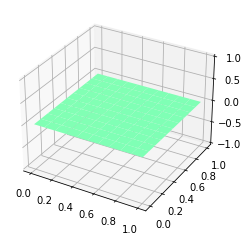

In [138]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim(-1,1)

x = np.array([d.xstep * i for i in range(d.I + 1)])
y = np.array([d.ystep * i for i in range(d.J + 1)])
x,y = np.meshgrid(x,y)


def update(frame):
    p[0].remove()
    p[0] = ax.plot_surface(x,
                        y,
                        d.T[:, :, frame * 10],
                        cmap='rainbow',
                        vmin=-1,
                        vmax=1)


p = [ax.plot_surface(x, y, d.T[:, :, 0], cmap='rainbow', vmin=-1, vmax=1)]
ani = animation.FuncAnimation(fig, update, 100, interval=100)

ani.save('2.gif')


演示动画 [2](2.gif)

# 5-3

## 1) 方程解析解
$$
\frac{\partial^2 u}{\partial t^2} = \lambda(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2})
$$

$$
\begin{cases}
    u|_{t=0} = \sin(\pi x)\sin(2\pi y)\\
    \frac{\partial u}{\partial t}|_{t = 0} = 0\\
    u|_{x=0} = u|_{x=1} = u|_{y=0} = u|_{y=1}=0\\
\end{cases}
$$

分离变量：
$$
u(x,y,t) = X(x)Y(y)T(t)
$$

代回可得：
$$
\frac{T''}{T} = \lambda(\frac{X''}{X}+\frac{Y''}{Y})
$$

根据初始条件$u|_{t=0} = \sin(\pi x)\sin(2\pi y)$与边界条件$u|_{t=0} = \sin(\pi x)\sin(2\pi y)$可得：
$$
X = \sin(\pi x)\\
Y = \sin(2\pi y)
$$

利用初始条件$\frac{\partial u}{\partial t}|_{t = 0} = 0$可得：
$$
T = cos(\sqrt{5\lambda\pi^2}t) = cos(\sqrt{5\lambda}\pi t)\\
u(x,y,t) = \sin(\pi x)\sin(2\pi y)cos(\sqrt{5\lambda}\pi t)
$$

## 2) 差分网格算法
$$
\frac{\partial^2 u}{\partial t^2} = \lambda(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2})
$$

$$
\begin{cases}
    u|_{t=0} = \sin(\pi x)\sin(2\pi y)\\
    \frac{\partial u}{\partial t}|_{t = 0} = 0\\
    u|_{x=0} = u|_{x=1} = u|_{y=0} = u|_{y=1}=0\\
\end{cases}
$$


根据 $x$ 方向上的边界条件 $u|_{x=0} = u|_{x=1} = 0$，可将 $u$ 展开：
$$
u = \sum_{i=1}^{I}\phi_i(y,t)\sin{(i\pi x)}
$$
记 $j$ 为 $y$ 的格点数，$j=0,\cdots,J$; $n$ 为 $t$ 的格点数 $N=0,\cdots,N$.
则上式（傅里叶变换）及其逆变换可以写作：
$$
u_{i,j} = \sum_{k=1}^{I}\phi_{k,j}\sin{(k\pi \frac{i}{I})}\\
\phi_{i,j} = \frac{2}{I}\sum_{k=1}^{I}u_{k,j}\sin{(k\pi \frac{i}{I})}
$$

代回方程得：
$$
\begin{aligned}
\frac{\partial^2 \phi_i}{\partial t^2} &= -\lambda(i\pi)^2\phi_i+\lambda\frac{\partial^2 \phi_i}{\partial y^2}\\
\frac{\phi_{i,j}^{n+1}-2\phi_{i,j}^{n}+\phi_{i,j}^{n-1}}{\delta t^2} &=-\frac{\lambda(i\pi)^2}{2}(\phi_{i,j}^{n+1}+\phi_{i,j}^{n})+\frac{\lambda}{2}(\frac{\phi_{i,j+1}^{n+1}-2\phi_{i,j}^{n+1}+\phi_{i,j-1}^{n+1}}{\delta y^2}+\frac{\phi_{i,j+1}^{n}-2\phi_{i,j}^{n}+\phi_{i,j-1}^{n}}{\delta y^2})\\
\end{aligned}
$$

$$
-\frac{C}{2} \phi^{n+1}_{i,j-1} + [1+C(1+\frac{(i\pi\delta y)^2}{2})]\phi^{n+1}_{i,j} - \frac{C}{2}\phi^{n+1}_{i,j+1}=\frac{C}{2}\phi^{n}_{i,j-1} + [2-C(1+\frac{(i\pi\delta y)^2}{2})]t^{n}_{i,j} +\frac{C}{2}\phi^{n}_{i,j+1}-\phi_{i,j}^{n-1}
$$

其中，
$$
C = \frac{\lambda\delta t^2}{\delta y^2};\quad i = 0,\cdots,I; \quad j = 1,\cdots, J-1
$$

再利用 $y$ 方向的边界条件 $u|_{y=0} = u|_{y=1}=0$，以及初始条件 $\frac{\partial u}{\partial t}|_{t = 0} = 0$ 可以得到：

$$
\phi_{i,0} = 0\\
\phi_{i,J} = 0\\
\phi_{i,j}^{1} = \phi_{i,j}^{0}
$$

由此，可以得到从 $n$ 时刻到 $n+1$ 时刻 $\phi$ 的递推关系：

$$
\begin{bmatrix}
    1&&&&&\\
    -\frac{C}{2}&M&-\frac{C}{2}&&\\
    &&&&\\
    &\ddots&\ddots&\ddots&\\
    &&&&\\
    &&-\frac{C}{2}&M&-\frac{C}{2}\\
    &&&&1
\end{bmatrix}
\cdot
\begin{bmatrix}
    \phi_{i,0}^{n+1}\\
    \phi_{i,1}^{n+1}\\
    \\
    \\
    \vdots\\
    \\
    \phi_{i,J}^{n+1}
\end{bmatrix}=
\begin{bmatrix}
    0\\
    f(\phi_{i,0}^{n},\phi_{i,1}^{n},\phi_{i,2}^{n},\phi_{i,1}^{n-1})\\
    f(\phi_{i,1}^{n},\phi_{i,2}^{n},\phi_{i,3}^{n},\phi_{i,2}^{n-1})\\
    \vdots\\
    \\
    f(\phi_{i,J-2}^{n},\phi_{i,J-1}^{n},\phi_{i,J}^{n},\phi_{i,J-1}^{n-1})\\
    0
\end{bmatrix}
$$
其中，
$$
M = 1+C(1+\frac{(i\pi\delta y)^2}{2})\\
f(\phi^{n}_{i,j-1},\phi^{n}_{i,j},\phi^{n}_{i,j+1},\phi^{n-1}_{i,j})=\frac{C}{2}\phi^{n}_{i,j-1} + [2-C(1+\frac{(i\pi\delta y)^2}{2})]\phi^{n}_{i,j} +\frac{C}{2}\phi^{n}_{i,j+1}-\phi_{i,j}^{n-1}
$$

In [139]:
class vibration():
    def __init__(self, I, J, N, lamb = 1):
        self.I = I
        self.J = J
        self.N = N
        self.xini = 0
        self.xfin = 1
        self.xstep = (self.xfin - self.xini) / I
        self.yini = 0
        self.yfin = 1
        self.ystep = (self.yfin - self.yini) / J
        self.tini = 0
        self.tfin = 5
        self.tstep = (self.tfin - self.tini) / N
        self.T = np.zeros((I + 1, J + 1, N + 1))
        self.phi = np.zeros((I + 1, J + 1, N + 1))
        self.con = np.zeros((I + 1, J + 1, N + 1))
        self.lamb = lamb

        self.C = self.lamb * self.tstep**2 / self.ystep**2
        # M=0的三对角矩阵
        A = np.zeros((self.J+1,self.J+1))
        A[0,0] = 1
        A[-1,-1] = 1
        for i in range(1,self.J):
            A[i][i-1] = -self.C / 2
            A[i][i+1] = -self.C / 2
        self.A = A
        self.stable = 1 / np.sqrt(self.lamb) * 1 / np.sqrt(1 / self.xstep**2 + 1 / self.ystep**2) - self.tstep

    def i_to_x(self, i):
        return self.xini + self.xstep * i

    def j_to_y(self, j):
        return self.yini + self.ystep * j

    def n_to_t(self, n):
        return self.tini + self.tstep * n

    # 初始条件
    def set_initial(self):
        for i in range(self.I + 1):
            for j in range(self.J + 1):
                self.T[i, j, 0] = np.sin(np.pi * self.i_to_x(i)) * np.sin(
                    2 * np.pi * self.j_to_y(j))
        # \partial u / \partial t = 0
        self.T[:, :, 1] = self.T[:, :, 0]
        for n in range(2):
            for i in range(self.I + 1):
                for j in range(self.J + 1):
                    sum = 0
                    for k in range(1, self.I + 1):
                        sum += self.T[k, j, n] * np.sin(k * np.pi * i / self.I)
                    self.phi[i, j, n] = 2 * sum / self.I

    def phi_to_T(self):
        for n in range(self.N+1):
            for i in range(self.I+1):
                for j in range(self.J+1):
                    sum = 0
                    for k in range(1, self.I+1):
                        sum += self.phi[k,j,n] * np.sin(k * np.pi * i / self.I)
                    self.T[i,j,n] = sum

    # def T_to_phi(self):
    #     for n in range(self.N + 1):
    #         for i in range(self.I + 1):
    #             for j in range(self.J + 1):
    #                 sum = 0
    #                 for k in range(1, self.I + 1):
    #                     sum += self.T[k,j,n] * np.sin(k * np.pi * i / self.I)
    #                 self.phi[i,j,n] = 2 * sum / self.I

    def Am(self,i):
        Ap = np.eye(self.J+1)
        Ap[0,0] = 0
        Ap[-1,-1] = 0
        return self.A + Ap * (1 + self.C * (1 + (i * np.pi * self.ystep)**2 / 2))

    def f(self,i,x,y,z,w):
        return self.C / 2 * x + (2 - self.C * (1 + (i * np.pi * self.ystep)**2 / 2)) * y + self.C / 2 * z - w

    def B(self,i,n):
        b = np.zeros(self.J+1)
        for j in range(1,self.J):
            b[j] = self.f(i,self.phi[i,j-1,n], self.phi[i,j,n], self.phi[i,j+1,n], self.phi[i,j,n-1])
        return b

    def forward(self):
        for n in range(2, self.N+1):
            for i in range(self.I+1):
                self.phi[i,:,n] = solve(self.Am(i),self.B(i,n-1))

    def cont(self):
        for n in range(self.N+1):
            for i in range(self.I+1):
                for j in range(self.J+1):
                    x = self.i_to_x(i)
                    y = self.j_to_y(j)
                    t = self.n_to_t(n)
                    self.con[i, j, n] = np.sin(np.pi * x) * np.sin(
                        2 * np.pi * y) * np.cos(
                            np.pi * t * np.sqrt(5 * self.lamb))


### a. 数值解（$x$ 取20个格点，$y$ 取20个格点，$t$ 取1000个格点，0-5s）

In [140]:
v = vibration(20, 20, 1000)
v.set_initial()
v.forward()
v.phi_to_T()

MovieWriter ffmpeg unavailable; using Pillow instead.


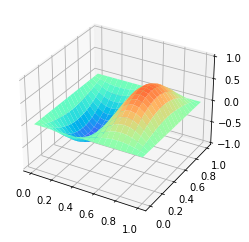

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim(-1, 1)

x = np.array([v.xstep * i for i in range(v.I + 1)])
y = np.array([v.ystep * i for i in range(v.J + 1)])
x, y = np.meshgrid(x, y)


def update(frame):
    p[0].remove()
    p[0] = ax.plot_surface(x,
                           y,
                           v.T[:, :, frame * 10],
                           cmap='rainbow',
                           vmin=-1,
                           vmax=1)


p = [ax.plot_surface(x, y, v.T[:, :, 0], cmap='rainbow', vmin=-1, vmax=1)]
ani = animation.FuncAnimation(fig, update, 100, interval=60)

ani.save('3_2_dis.gif')

演示动画为[3_2_dis](3_2_dis.gif)

### b. 闭式解

In [142]:
v.cont()

MovieWriter ffmpeg unavailable; using Pillow instead.


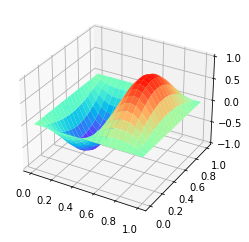

In [143]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim(-1, 1)

x = np.array([v.xstep * i for i in range(v.I + 1)])
y = np.array([v.ystep * i for i in range(v.J + 1)])
x, y = np.meshgrid(x, y)


def update(frame):
    p[0].remove()
    p[0] = ax.plot_surface(x,
                           y,
                           v.con[:, :, frame * 10],
                           cmap='rainbow',
                           vmin=-1,
                           vmax=1)


p = [ax.plot_surface(x, y, v.con[:, :, 0], cmap='rainbow', vmin=-1, vmax=1)]
ani = animation.FuncAnimation(fig, update, 100, interval=60)

ani.save('3_2_con.gif')

演示动画为[3_2_con](3_2_con.gif)

比较数值解与解析解的结果可以发现，随着t增大，数值解的振动幅度逐渐减小，而解析解的振动幅度维持不变，在t较大时，数值解逐渐偏离解析解。

## 3)
记 $stable = \frac{1}{\sqrt{\lambda}}(\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2})^{-1/2}-\Delta t$

In [144]:
def animate(v,name):
    v.set_initial()
    v.forward()
    v.phi_to_T()
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_zlim(-1, 1)

    x = np.array([v.xstep * i for i in range(v.I + 1)])
    y = np.array([v.ystep * i for i in range(v.J + 1)])
    x, y = np.meshgrid(x, y)


    def update(frame):
        p[0].remove()
        p[0] = ax.plot_surface(x,
                            y,
                            v.con[:, :, frame * 10],
                            cmap='rainbow',
                            vmin=-1,
                            vmax=1)


    p = [ax.plot_surface(x, y, v.con[:, :, 0], cmap='rainbow', vmin=-1, vmax=1)]
    ani = animation.FuncAnimation(fig, update, 100, interval=60)

    ani.save(name + '.gif')

### 第一组(满足稳定性条件)

In [145]:
v1 = vibration(10, 10, 1000)
print('stable = ', v1.stable)
print('lambda = ', v1.lamb)
print('delta_x = ', v1.xstep)
print('delta_y = ', v1.ystep)
print('delta_z = ', v1.tstep)
if v1.stable >= 0:
    print('满足稳定性条件！')
else:
    print('不满足稳定性条件！')


stable =  0.06571067811865476
lambda =  1
delta_x =  0.1
delta_y =  0.1
delta_z =  0.005
满足稳定性条件！


In [146]:
v1.set_initial()
v1.forward()
v1.phi_to_T()

MovieWriter ffmpeg unavailable; using Pillow instead.


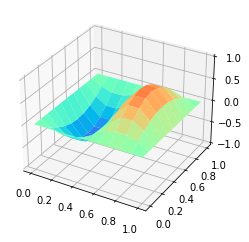

In [147]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim(-1, 1)

x = np.array([v1.xstep * i for i in range(v1.I + 1)])
y = np.array([v1.ystep * i for i in range(v1.J + 1)])
x, y = np.meshgrid(x, y)

def update(frame):
    p[0].remove()
    p[0] = ax.plot_surface(x,
                        y,
                        v1.T[:, :, frame * 10],
                        cmap='rainbow',
                        vmin=-1,
                        vmax=1)


p = [ax.plot_surface(x, y, v1.T[:, :, 0], cmap='rainbow', vmin=-1, vmax=1)]
ani = animation.FuncAnimation(fig, update, 100, interval=60)

ani.save('3_3_v1.gif')

演示动画为[3_3_v1](3_3_v1.gif)

### 第二组(不满足稳定性条件)

In [148]:
v2 = vibration(20, 20, 100, lamb=2)
print('stable = ', v2.stable)
print('delta_x = ', v2.xstep)
print('delta_y = ', v2.ystep)
print('delta_z = ', v2.tstep)
if v2.stable >= 0:
    print('满足稳定性条件！')
else:
    print('不满足稳定性条件！')

stable =  -0.025
delta_x =  0.05
delta_y =  0.05
delta_z =  0.05
不满足稳定性条件！


In [149]:
v2.set_initial()
v2.forward()
v2.phi_to_T()

MovieWriter ffmpeg unavailable; using Pillow instead.


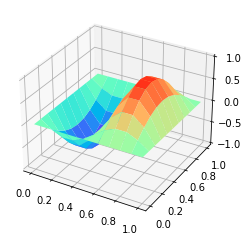

In [150]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim(-1, 1)

x = np.array([v1.xstep * i for i in range(v1.I + 1)])
y = np.array([v1.ystep * i for i in range(v1.J + 1)])
x, y = np.meshgrid(x, y)


def update(frame):
    p[0].remove()
    p[0] = ax.plot_surface(x,
                           y,
                           v1.T[:, :, frame * 1],
                           cmap='rainbow',
                           vmin=-1,
                           vmax=1)


p = [ax.plot_surface(x, y, v1.T[:, :, 0], cmap='rainbow', vmin=-1, vmax=1)]
ani = animation.FuncAnimation(fig, update, 100, interval=60)

ani.save('3_3_v2.gif')

演示动画为[3_3_v2](3_3_v2.gif)

综合上述两种情况可以发现，满足稳定性条件时，得到的数值解可以维持较长时间的振动，而不满足稳定性条件时，得到的数值解在短时间的几次振动过后就衰减为振幅极小的振动，偏离解析解。

## 4) $\Delta x=\Delta y$时的动画展示
见 [第二问中的动画](3_2_dis.gif) 或 [第三问中的动画](3_3_v1.gif) 即可。

# 5-4

## 1)

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt


def generate_random(times):
    l = np.zeros(10)
    p = []
    for i in range(times):
        x = random.random()
        n = int(10 * x // 1)
        l[n] += 1
    p.append(l[3] / times)
    return p, l


In [5]:
pro = []
cou = []
times = 1000
ctr = 10000
for i in range(ctr):
    p, l = generate_random(times)
    pro.append(p)
    c = 0
    for nk in l:
        c += (nk - times / 10)**2 / (times / 10)
    cou.append(c)

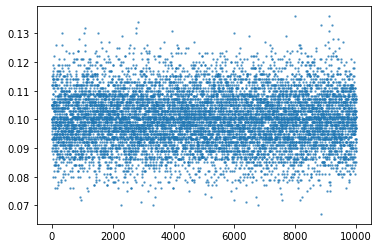

In [16]:
plt.scatter(np.arange(1, ctr + 1), pro, s=2, alpha=0.6)
plt.show()

可以从上面的图看出，$[0.3,0.4]$内随机数的比例在$0.06\sim 0.14$之间波动。

从分布曲线可以看出，随机数在某个给定小区间中的频率不断波动，这也是自然的，符合随机的概念，这个波动的程度会随撒点数的增多而减少。

## 2)
### a. 均匀性检验
这个问题中，$k=10$，$m_k=\frac{times}{10}$. 上面的代码 $times=1000$.
$$
\begin{aligned}
\mathcal{X}^2&=\sum_{k=1}^{10}\frac{(n_k-m_k)^2}{m_k}\\
&=\sum_{k=1}^{10}\frac{(n_k-100)^2}{100}
\end{aligned}
$$

此问题中，系统自由度为 $df=k-1=9$，查询 $\mathcal{X}^2$ 表可知，$\mathcal{X}^2$ 标准值为16.92

每次撒点的chi2如下：

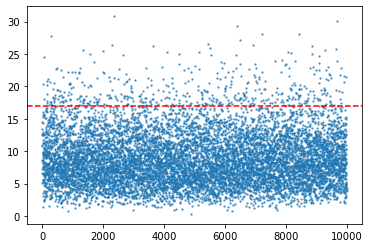

In [18]:
plt.scatter(np.arange(1, ctr + 1), cou, s=2, alpha=0.6)
plt.axhline(y=16.92, c='r', linestyle='--', label='standard for df = 9')
plt.show()

均匀性检验的通过率如下：

In [12]:
sum(np.array(cou) <= 16.92)/len(cou)

0.953

### b. 独立性检验

此问题中，系统自由度为 $k-1=9,df=81$，查询 $\mathcal{X}^2$ 表可知，$\mathcal{X}^2$ 标准值为103.1

In [56]:
def independency(times=1000, k=10, N=10000):
    m = N / 2 / k**2
    t = np.arange(times)
    chi = []
    for time in range(times):
        table = np.zeros((k, k), int)
        for i in range(N // 2):
            x = random.random()
            y = random.random()
            table[int(x * 10 // 1), int(y * 10 // 1)] += 1
        chi.append(np.sum((table - m)**2 / m))
    return t, chi


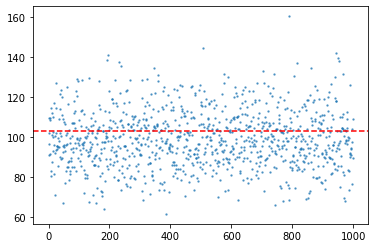

In [57]:
times, chi = independency()
plt.scatter(times, chi, s=2, alpha= 0.6)
plt.axhline(y=103.1, c='r', linestyle='--', label='standard for df = 9')
plt.show()

独立性检验的通过率如下：

In [59]:
sum(np.array(chi) <= 103.1) / len(chi)

0.628